In [1]:
import pandas as pd
import pagerank_spark as pr
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('u.data')

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [4]:
df = df[df['rating'] > 4]

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, random_state = 42)

In [6]:
df = df.drop(['rating', 'timestamp'], axis=1)

In [7]:
verts = []
for uid, mregion in train.groupby('user_id'):
    movies = mregion['item_id'].tolist()
    verts.append(list(map(lambda x : list(map(lambda y: list(zip([x], [y])) if x != y else None, movies)), movies)))

data = []
for x in verts:
    for y in x:
        if y[0] != None:
            data.append(y[0][0])

In [8]:
print(data)

[(208, 253), (50, 253), (89, 253), (223, 253), (270, 253), (170, 253), (87, 253), (176, 253), (216, 253), (207, 253), (174, 253), (124, 253), (91, 253), (242, 253), (15, 253), (198, 253), (183, 253), (113, 253), (269, 253), (93, 253), (228, 253), (154, 253), (168, 253), (9, 253), (48, 253), (246, 253), (32, 253), (59, 253), (178, 253), (204, 253), (114, 253), (191, 253), (152, 253), (173, 253), (82, 253), (127, 253), (19, 253), (60, 253), (111, 253), (195, 253), (196, 253), (44, 253), (172, 253), (224, 253), (42, 253), (64, 253), (169, 253), (221, 253), (45, 253), (6, 253), (177, 253), (197, 253), (109, 253), (127, 311), (283, 311), (242, 311), (50, 311), (302, 311), (313, 311), (285, 311), (251, 311), (316, 311), (320, 340), (347, 340), (354, 362), (324, 362), (327, 362), (329, 362), (301, 362), (294, 362), (361, 362), (359, 362), (303, 362), (360, 362), (174, 428), (209, 428), (189, 428), (390, 428), (228, 428), (257, 428), (109, 428), (430, 428), (89, 428), (153, 428), (172, 428), (

In [18]:
resdf = pr.pageSparkList(data,1000)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 185 in stage 562.0 failed 1 times, most recent failure: Lost task 185.0 in stage 562.0 (TID 317153, localhost, executor driver): ExecutorLostFailure (executor driver exited caused by one of the running tasks) Reason: Executor heartbeat timed out after 367747 ms
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1887)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1875)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1874)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1874)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2108)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2057)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2046)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [10]:
resdfCop = resdf.copy(deep=True)
resdfCop

,_1,_2
0,226,3.780888
1,174,3.712031
2,96,3.687513
3,238,3.580046
4,100,3.510842
5,88,3.481804
6,3,3.462761
7,197,3.257578
8,50,3.230011
9,222,3.102656


In [11]:
movie_df = pd.read_csv('u.item')

In [12]:
movie_df = movie_df.drop(list(map(lambda x : str(x), list(range(1,25)))), axis=1)

In [13]:
movie_df

,id,name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [14]:
name_dict = movie_df.set_index('id').to_dict()['name']
name_dict

{1: 'Toy Story (1995)',
 2: 'GoldenEye (1995)',
 3: 'Four Rooms (1995)',
 4: 'Get Shorty (1995)',
 5: 'Copycat (1995)',
 6: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 7: 'Twelve Monkeys (1995)',
 8: 'Babe (1995)',
 9: 'Dead Man Walking (1995)',
 10: 'Richard III (1995)',
 11: 'Seven (Se7en) (1995)',
 12: 'Usual Suspects',
 13: 'Mighty Aphrodite (1995)',
 14: 'Postino',
 15: "Mr. Holland's Opus (1995)",
 16: 'French Twist (Gazon maudit) (1995)',
 17: 'From Dusk Till Dawn (1996)',
 18: 'White Balloon',
 19: "Antonia's Line (1995)",
 20: 'Angels and Insects (1995)',
 21: 'Muppet Treasure Island (1996)',
 22: 'Braveheart (1995)',
 23: 'Taxi Driver (1976)',
 24: 'Rumble in the Bronx (1995)',
 25: 'Birdcage',
 26: 'Brothers McMullen',
 27: 'Bad Boys (1995)',
 28: 'Apollo 13 (1995)',
 29: 'Batman Forever (1995)',
 30: 'Belle de jour (1967)',
 31: 'Crimson Tide (1995)',
 32: 'Crumb (1994)',
 33: 'Desperado (1995)',
 34: 'Doom Generation',
 35: 'Free Willy 2: The Adventure Home (1

In [15]:
resdf['_1'] = resdf['_1'].apply(lambda x: name_dict[x])

In [16]:
resdf

,_1,_2
0,Die Hard 2 (1990),3.780888
1,Raiders of the Lost Ark (1981),3.712031
2,Terminator 2: Judgment Day (1991),3.687513
3,Raising Arizona (1987),3.580046
4,Fargo (1996),3.510842
5,Sleepless in Seattle (1993),3.481804
6,Four Rooms (1995),3.462761
7,Graduate,3.257578
8,Star Wars (1977),3.230011
9,Star Trek: First Contact (1996),3.102656


(-1, 10)

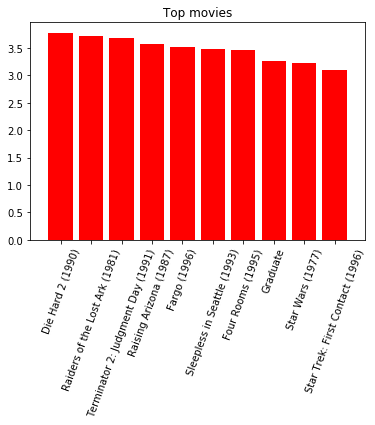

In [17]:
d_first = 10
plt.title("Top movies")
plt.bar(range(d_first), resdf['_2'][:d_first], align = 'center', color = 'r')
plt.xticks(range(d_first), resdf['_1'][:d_first], rotation = 70)
plt.xlim([-1, d_first])

In [118]:
test.shape

(6361, 2)